In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from google.colab import files
from datasets import Dataset
from transformers import RobertaTokenizer

# Upload and load CSV
uploaded = files.upload()

# Replace with your actual CSV file name
df = pd.read_csv('filtered_data.csv')

# Check the columns and first few rows of the dataset
print(df.columns)
print(df.head())

# Load the tokenizer for MyanBERTa
tokenizer = RobertaTokenizer.from_pretrained('UCSYNLP/MyanBERTa')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples['comment'],
        padding='max_length',
        truncation=True,
        max_length=256
    )

# Tokenizing the dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.map(tokenize_function, batched=True)

print("Tokenization complete.")


Saving filtered_data.csv to filtered_data.csv
Index(['ID', 'comment', 'sentiment'], dtype='object')
   ID                                            comment sentiment
0   1                                                 💆😉  positive
1   2                                                  🎉  positive
2   3  ခံစားချက်နဲ့တိုက်ဆိုင်တဲ့သီချင်းတပုဒ်ကို ကို ထ...  negative
3   4                                                  🙂  positive
4   5                                              😅😅😊🎉🎉  positive


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.13M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/590k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/387k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Map:   0%|          | 0/3889 [00:00<?, ? examples/s]

Tokenization complete.


In [ ]:
# Split the dataset into training and testing
train_test_split = dataset.train_test_split(test_size=0.2)

# Separate train and test datasets
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Check if everything is correct
print(f"Train Dataset: {train_dataset}")
print(f"Test Dataset: {test_dataset}")


Train Dataset: Dataset({
    features: ['ID', 'comment', 'sentiment', 'input_ids', 'attention_mask'],
    num_rows: 3111
})
Test Dataset: Dataset({
    features: ['ID', 'comment', 'sentiment', 'input_ids', 'attention_mask'],
    num_rows: 778
})


In [ ]:
# Define the label mapping dictionary
label_map = {"positive": 0, "negative": 1, "neutral": 2}

# Strip any leading or trailing spaces from the 'sentiment' column
train_dataset = train_dataset.map(lambda x: {'sentiment': x['sentiment'].strip()})
test_dataset = test_dataset.map(lambda x: {'sentiment': x['sentiment'].strip()})

# Now map the sentiment column to numeric labels
train_dataset = train_dataset.map(lambda x: {'labels': label_map[x['sentiment']]})
test_dataset = test_dataset.map(lambda x: {'labels': label_map[x['sentiment']]})

# Set the dataset format to PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Verify the format
print(train_dataset[0])  # Check the first example from the train dataset


Map:   0%|          | 0/3111 [00:00<?, ? examples/s]

Map:   0%|          | 0/778 [00:00<?, ? examples/s]

Map:   0%|          | 0/3111 [00:00<?, ? examples/s]

Map:   0%|          | 0/778 [00:00<?, ? examples/s]

{'input_ids': tensor([   0,  926,  263,  334,  265,  414,  320,  279,  309,  559,  263,  276,
         357,  279,  267,  388,  263,  269,  681,  270,  271,  334,  272,  276,
         263,  304,  271,  270,  263,  283,  303, 1073,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1, 

In [ ]:
from transformers import RobertaForSequenceClassification

# Load the pre-trained model
model = RobertaForSequenceClassification.from_pretrained('UCSYNLP/MyanBERTa', num_labels=3)

# Define compute_metrics function
from sklearn.metrics import accuracy_score

def compute_metrics(p):
    preds, labels = p
    preds = preds.argmax(axis=1)  # Convert logits to class labels
    return {"accuracy": accuracy_score(labels, preds)}

# Training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',           # Output directory
    num_train_epochs=3,               # Number of epochs
    per_device_train_batch_size=8,    # Batch size
    per_device_eval_batch_size=8,     # Eval batch size
    warmup_steps=500,                 # Learning rate warmup
    weight_decay=0.01,                # Regularization
    logging_dir='./logs',             # Log directory
    logging_steps=10,                 # Logging frequency
    evaluation_strategy="epoch",
    save_strategy="epoch"
)


config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at UCSYNLP/MyanBERTa and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

print(train_dataset[0])

{'input_ids': tensor([   0,  926,  263,  334,  265,  414,  320,  279,  309,  559,  263,  276,
         357,  279,  267,  388,  263,  269,  681,  270,  271,  334,  272,  276,
         263,  304,  271,  270,  263,  283,  303, 1073,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1, 

In [ ]:
# Train model
trainer.train()

print(train_dataset[0])

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: yadanamhein (yadanamhein-liverpool-john-moores-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.698100,0.825887,0.670951
2,0.683500,0.698951,0.719794
3,0.336700,0.720365,0.744216


{'input_ids': tensor([   0,  926,  263,  334,  265,  414,  320,  279,  309,  559,  263,  276,
         357,  279,  267,  388,  263,  269,  681,  270,  271,  334,  272,  276,
         263,  304,  271,  270,  263,  283,  303, 1073,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1, 

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


True
Tesla T4


In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.720364511013031, 'eval_accuracy': 0.7442159383033419, 'eval_runtime': 10.5669, 'eval_samples_per_second': 73.626, 'eval_steps_per_second': 9.274, 'epoch': 3.0}


In [ ]:
# Save the model
model.save_pretrained('./my_model')
tokenizer.save_pretrained('./my_model')


('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.json',
 './my_model/merges.txt',
 './my_model/added_tokens.json')

In [ ]:
# Make predictions with the trained model
predictions = trainer.predict(test_dataset)
print(predictions)


PredictionOutput(predictions=array([[ 3.974818  , -1.8999575 , -1.3319038 ],
       [ 3.8544793 , -1.8660895 , -1.3936342 ],
       [-1.8264806 ,  1.0637342 , -0.13364835],
       ...,
       [-0.12577504,  1.8797585 , -2.3610113 ],
       [ 3.5684643 , -1.0815473 , -1.8729742 ],
       [-1.1121541 ,  2.492648  , -1.8995017 ]], dtype=float32), label_ids=array([0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2,

In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import login
login()  # It will prompt you to enter your Hugging Face credentials


In [ ]:
!zip -r fine_tuned_model.zip ./my_model


  adding: my_model/ (stored 0%)
  adding: my_model/config.json (deflated 51%)
  adding: my_model/merges.txt (deflated 65%)
  adding: my_model/vocab.json (deflated 73%)
  adding: my_model/tokenizer_config.json (deflated 75%)
  adding: my_model/model.safetensors (deflated 7%)
  adding: my_model/special_tokens_map.json (deflated 85%)


Data Visualization

Please upload your CSV file:


Saving filtered_data.csv to filtered_data.csv


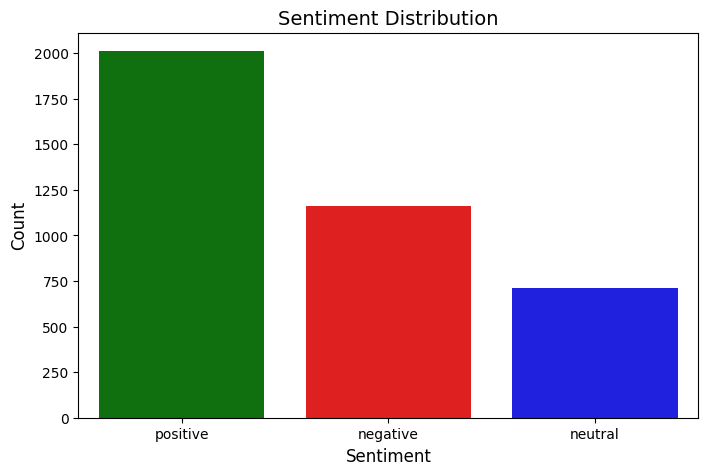

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Remove this line if not using Google Colab

# Step 1: Upload CSV File
print("Please upload your CSV file:")
uploaded = files.upload()  # Opens file upload dialog

# Get the filename
filename = list(uploaded.keys())[0]

# Step 2: Load Dataset
df = pd.read_csv(filename)

# Clean Sentiment Column (Remove Spaces)
df["sentiment"] = df["sentiment"].str.strip()

# Step 3: Count Sentiments
sentiment_counts = df["sentiment"].value_counts()

# Step 4: Visualize Sentiment Distribution with a Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, legend=False,
            palette={"positive": "green", "negative": "red", "neutral": "blue"})

# Labels and Title
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution", fontsize=14)

# Show Plot
plt.show()
